In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split

In [25]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

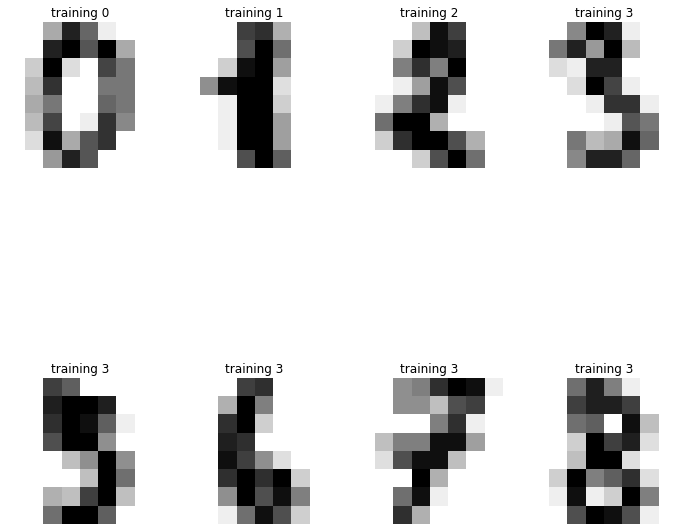

In [19]:
_,axes = plt.subplots(2,4,figsize = (12,12))
images_and_labels = list(zip(digits.images,digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation = 'nearest')
    ax.set_title('training %i'%label)
    
for ax,(image,labels) in zip(axes[1,:],images_and_labels[5:10]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation = 'nearest')
    ax.set_title('training %i'%label)

    

In [20]:
n_samples = len(digits.images)
data = digits.images.reshape(n_samples,-1)

In [28]:
X = digits.data
y = digits.target

In [29]:
clf = svm.SVC(gamma = 0.001)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,shuffle = True)

In [44]:
clf.fit(X_train,y_train)

SVC(gamma=0.001)

In [64]:
prediction = clf.predict(X_test)
X_test = X_test.reshape(-1,8,8)

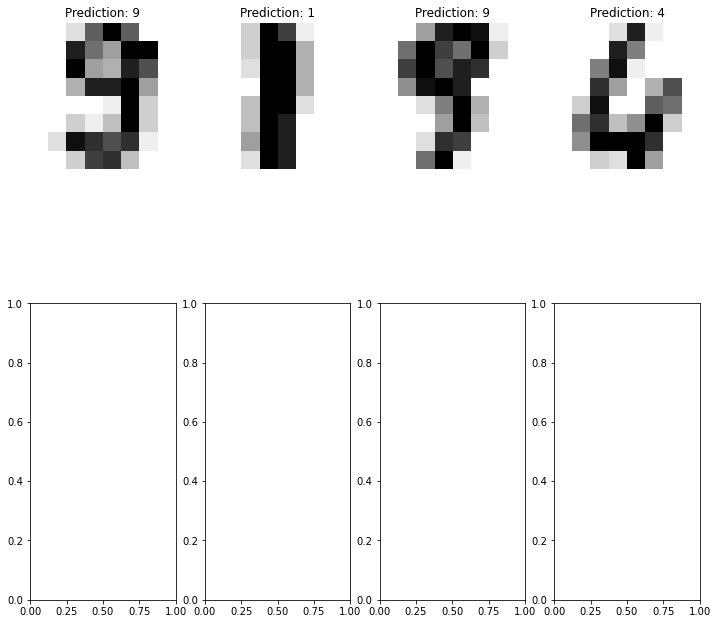

In [66]:
images_and_predictions = list(zip(X_test,y_pred))
_,axes = plt.subplots(2,4,figsize = (12,12))
for ax, (image, prediction) in zip(axes[0, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

In [73]:
# print("Classification report for classifier %s:\n%s\n"% (clf, metrics.classification_report(y_test, prediction)))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

ValueError: Found array with dim 3. Estimator expected <= 2.